# Lab Class Week 4

Here are some example solution codes for the lab class in week 4.

Code from the demo:

In [1]:
#include <iostream>
#include <cmath>
#include <random>
#include <chrono>
using namespace std;

In [2]:
{
    mt19937 rng;
    cout << rng() << endl;
}

3499211612


## Tasks:

- Use a loop to output the first 1000 numbers in the sequence.
- Try resetting the seed using the number 123 inside the loop -- what happens?
- Try resetting the seed using a `random_device` inside the loop -- what happens?

## Solutions:

In [3]:
{
    mt19937 rng;
    for(int i=0;i<1000;i++)
        cout << i+1 << " \t" << rng() << endl;
}

1 	3499211612
2 	581869302
3 	3890346734
4 	3586334585
5 	545404204
6 	4161255391
7 	3922919429
8 	949333985
9 	2715962298
10 	1323567403
11 	418932835
12 	2350294565
13 	1196140740
14 	809094426
15 	2348838239
16 	4264392720
17 	4112460519
18 	4279768804
19 	4144164697
20 	4156218106
21 	676943009
22 	3117454609
23 	4168664243
24 	4213834039
25 	4111000746
26 	471852626
27 	2084672536
28 	3427838553
29 	3437178460
30 	1275731771
31 	609397212
32 	20544909
33 	1811450929
34 	483031418
35 	3933054126
36 	2747762695
37 	3402504553
38 	3772830893
39 	4120988587
40 	2163214728
41 	2816384844
42 	3427077306
43 	153380495
44 	1551745920
45 	3646982597
46 	910208076
47 	4011470445
48 	2926416934
49 	2915145307
50 	1712568902
51 	3254469058
52 	3181055693
53 	3191729660
54 	2039073006
55 	1684602222
56 	1812852786
57 	2815256116
58 	746745227
59 	735241234
60 	1296707006
61 	3032444839
62 	3424291161
63 	136721026
64 	1359573808
65 	1189375152
66 	3747053250
67 	198304612
68 	640439652
69 	417

529 	423966005
530 	3293613218
531 	1124728190
532 	1407880681
533 	1440346680
534 	554334954
535 	2919409323
536 	1253962019
537 	586491243
538 	3638308238
539 	3097648541
540 	991125519
541 	458538714
542 	2155963569
543 	2807866455
544 	6862945
545 	2122460897
546 	53853750
547 	3346001678
548 	1230879976
549 	3071060893
550 	423909157
551 	3881450262
552 	1652511030
553 	3826483009
554 	1526211009
555 	1435219366
556 	3092251623
557 	3001090498
558 	281084412
559 	849586749
560 	2207008400
561 	131172352
562 	1820973075
563 	3195774605
564 	2962673849
565 	2147580010
566 	1090677336
567 	2061249893
568 	1724513375
569 	3885752424
570 	1135918139
571 	2619357288
572 	4012575714
573 	2652856935
574 	2029480458
575 	3691276589
576 	2623865075
577 	3459550738
578 	2097670126
579 	2477000057
580 	2209844713
581 	785646024
582 	1052349661
583 	1030500157
584 	1430246618
585 	3807539761
586 	2157629976
587 	123154542
588 	2560049331
589 	2104110449
590 	1332109867
591 	721241591
592 	4136

In [4]:
{
    mt19937 rng;
    rng.seed(123);
    for(int i=0;i<10;i++)
        cout << rng() << endl;
}

2991312382
3062119789
1228959102
1840268610
974319580
2967327842
2367878886
3088727057
3090095699
2109339754


Reseeding every time generates the same number over and over...

In [5]:
{
    mt19937 rng;
    for(int i=0;i<10;i++)
    {
        rng.seed(123);
        cout << rng() << endl; 
    }
}

2991312382
2991312382
2991312382
2991312382
2991312382
2991312382
2991312382
2991312382
2991312382
2991312382


A `random_device` uses truly random observations to give a random start to your random generator.

In [6]:
{
    mt19937 rng;
    random_device randomSeed;
    rng.seed(randomSeed());
    for(int i=0;i<10;i++)
    {
        cout << rng() << endl;
    }   
}

2585122607
1560366765
673108878
599465527
2571437868
1315804377
303619193
369068203
2334019150
2496485961


Why not use it at every step?

In [7]:
{
    mt19937 rng;
    random_device randomSeed;
    for(int i=0;i<10;i++)
    {
        rng.seed(randomSeed());
        cout << rng() << endl;
    }   
}

2939901518
2648026870
2801737449
565649083
1839532591
3067708666
2769314733
2109877406
304240821
1059341815


Looks good, so why not use this truly random generator? Let's test the efficiency...

In [8]:
{
    int N=1.e5;
    // get start time
    auto start = std::chrono::steady_clock::now(); 
    // code in here is timed
    mt19937 rng;
    rng.seed(123);
    double sum=0.;
    for(int i=0;i<N;i++)
    {
        sum = sum + rng();
    }
    cout << sum << endl;
    // get finish time
    auto finish = std::chrono::steady_clock::now();
    // convert into real time in seconds
    auto elapsed = std::chrono::duration_cast<std::chrono::duration<double> >(finish - start);
    // output values
    cout << " Total time elapsed for "; 
    cout << N << " calculations is " << elapsed.count() << endl;
}

2.15445e+14
 Total time elapsed for 100000 calculations is 0.00301949


Ok, pretty fast, let's see how quick using a `randomSeed` at every step is...

In [9]:
{
    int N=1.e5;
    // get start time
    auto start = std::chrono::steady_clock::now(); 
    // code in here is timed
    mt19937 rng;
    random_device randomSeed;
    double sum=0.;
    for(int i=0;i<N;i++)
    {
        rng.seed(randomSeed());
        sum = sum + rng();
    }
    cout << sum << endl;
    // get finish time
    auto finish = std::chrono::steady_clock::now();
    // convert into real time in seconds
    auto elapsed = std::chrono::duration_cast<std::chrono::duration<double> >(finish - start);
    // output values
    cout << " Total time elapsed for "; 
    cout << N << " calculations is " << elapsed.count() << endl;
}

2.1503e+14
 Total time elapsed for 100000 calculations is 1.26385


Not so quick! It is about 1000 times slower calling a new random seed compared to the next number in the random number sequence. Hopefully you can now see the reason we only call the random seed once in a program. For most of this course, in fact a random seed is not needed at all!

## Tasks:

- Run the code above and check the result makes sense.
- Put the algorithm into a function  like this:
  `double calcProb(double a,double b,int N)}`
- Return the calculated probability for different values of $N$, what can you say about the results as $N\rightarrow\infty$?

## Solutions:

In [10]:
// Monte Carlo estimate of the probability that
// a random number from a uniform distribution u~U(0,1)
// falls between a < u < b
// INPUTS
// double a -- lower value of interval
// double b -- upper value of interval
// int N -- Total number of simulations
// RETURN
// double -- estimate of the probability
double calcProb(double a,double b,int N)
{
    // declare a random number generator
    // here we choose the merton twister engine (32bit)
    // the static keyword keeps the position in the sequence 
    // from previous calls
    static mt19937 rng;
    // a uniform distribution
    uniform_real_distribution<double> U(0.,1.);

    // keep track of payoff
    double sum=0;
    for(int i=0;i<N;i++)
    {
        double u=U(rng); // generate the random number 
        if(0.25 < u && u < 0.5) // split the interval condition
        {
            sum += 1;// add in payoff
        }
    }

    return sum/N;
}

In [11]:
{
    cout << calcProb(0.25,0.5,100) << endl;
}

0.24


Print out some of these values for different $N$.

In [12]:
{
    for(int N=10;N<=1000;N++)
    {
        cout << N << " " << calcProb(0.25,0.5,N) <<endl;
    }
}

10 0.3
11 0.272727
12 0.166667
13 0.230769
14 0.214286
15 0.4
16 0.5625
17 0.294118
18 0.222222
19 0.210526
20 0.25
21 0.428571
22 0.318182
23 0.217391
24 0.208333
25 0.24
26 0.307692
27 0.259259
28 0.357143
29 0.137931
30 0.266667
31 0.193548
32 0.15625
33 0.272727
34 0.205882
35 0.342857
36 0.333333
37 0.351351
38 0.289474
39 0.128205
40 0.2
41 0.170732
42 0.261905
43 0.302326
44 0.363636
45 0.266667
46 0.108696
47 0.234043
48 0.333333
49 0.142857
50 0.24
51 0.333333
52 0.307692
53 0.320755
54 0.148148
55 0.272727
56 0.25
57 0.333333
58 0.258621
59 0.169492
60 0.283333
61 0.278689
62 0.274194
63 0.238095
64 0.21875
65 0.276923
66 0.227273
67 0.268657
68 0.161765
69 0.275362
70 0.2
71 0.211268
72 0.180556
73 0.246575
74 0.324324
75 0.146667
76 0.223684
77 0.194805
78 0.192308
79 0.278481
80 0.2625
81 0.17284
82 0.182927
83 0.385542
84 0.202381
85 0.294118
86 0.302326
87 0.137931
88 0.238636
89 0.213483
90 0.166667
91 0.197802
92 0.228261
93 0.247312
94 0.223404
95 0.336842
96 0.302083

661 0.251135
662 0.228097
663 0.257919
664 0.248494
665 0.203008
666 0.238739
667 0.244378
668 0.212575
669 0.26009
670 0.253731
671 0.271237
672 0.255952
673 0.222883
674 0.25816
675 0.235556
676 0.252959
677 0.242245
678 0.264012
679 0.260677
680 0.258824
681 0.232012
682 0.253666
683 0.256223
684 0.230994
685 0.242336
686 0.266764
687 0.26492
688 0.263081
689 0.25254
690 0.252174
691 0.266281
692 0.276012
693 0.258297
694 0.214697
695 0.240288
696 0.261494
697 0.256815
698 0.267908
699 0.267525
700 0.265714
701 0.278174
702 0.306268
703 0.273115
704 0.244318
705 0.255319
706 0.226629
707 0.240453
708 0.233051
709 0.25952
710 0.23662
711 0.227848
712 0.268258
713 0.231417
714 0.242297
715 0.229371
716 0.273743
717 0.242678
718 0.271588
719 0.257302
720 0.243056
721 0.253814
722 0.271468
723 0.250346
724 0.23895
725 0.233103
726 0.225895
727 0.259972
728 0.269231
729 0.24417
730 0.242466
731 0.25855
732 0.266393
733 0.241473
734 0.254768
735 0.262585
736 0.252717
737 0.242877
738 0.22

Now I'm going to plot these in the notebook. You should use excel/matplot/python or some other plotting package.

In [13]:
#include "math60082_lab_plot_loader.hpp"

In [14]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-4-1.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    // write N vs P(a,b,N) to a file
    // each column must be separated by a comma
    // each row goes on a new line
    for(int N=10;N<=1000;N++)
    {
        output << N << " , " << calcProb(0.25,0.5,N) <<endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


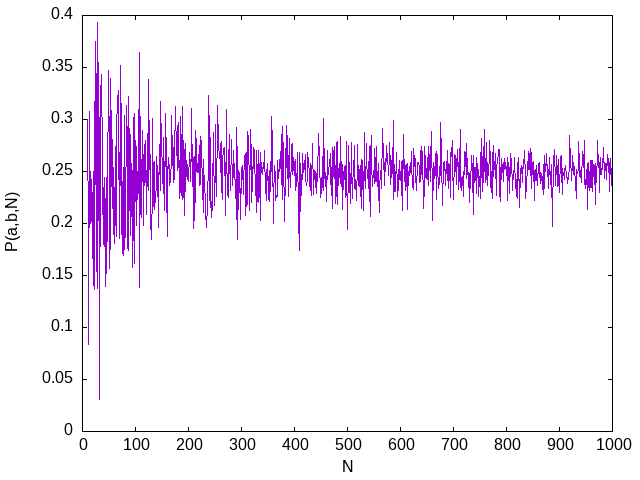

In [15]:
MATH60082::gnuplotImage fig1;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'N'" << endl;
    ss << "set ylabel 'P(a,b,N)'" << endl;
    ss << "unset key"<< endl;
    ss << "p'test-4-1.csv' u 1:2 w l";
    fig1 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig1

Looking at the graph, we can sort of see visually the law of large numbers here. If we denote the value $P_N$ as our estimate of the true value $\hat P=0.25$ with $N$ paths, then
$$
\sqrt{N}\left(P_N - \hat P \right) \rightarrow^d N(0,\eta^2) 
$$
or in other words the value of our estimate goes random around the true value, with a smaller variance as $N$ increases.

## Tasks:

- Create a loop in your program to generate $totalRuns$ draws from $\phi \sim N(0, 1)$.
- Use the interval selection code to find which bin each random number lands in `(jStar)`
- increment (or add one) to the appropriate bin `(counter[jStar])`
- Plot out your results of `x` vs `counter` – does it look normal?

## Solution:

In [16]:
{
    // input parameters
    int totalRuns=10; // total number of simulations
    // interval specification
    const int n=21;  // number of intervals
    double a=-4.2,b=4.2;// start/end points
    double h=(b-a)/n;// fixed interval width
    double x[n];// center of intervals

    // local storage
    int counter[n];// number of times landing in interval

    mt19937 rng;
    // a uniform distribution
    normal_distribution<double> Phi(0.,1.);
    
    for(int j=0;j<n;j++)
    {
        x[j] = a+h/2.+j*h;
        counter[j]=0;
    }

    for(int run=0;run<totalRuns;run++)
    {
        double phi=Phi(rng); // generate the random number 
        int jStar = floor( (phi-a)/h ); // use the floor function to get j* for the nearest point to x_j* to phi
        cout << phi << " " << jStar << " " << a+jStar*h << " " << a+(jStar+1)*h << endl;
    }
}

0.13453 10 -0.2 0.2
-0.146382 10 -0.2 0.2
0.46065 11 0.2 0.6
-1.87138 5 -2.2 -1.8
0.163712 10 -0.2 0.2
-0.214253 9 -0.6 -0.2
0.298595 11 0.2 0.6
-0.827944 8 -1 -0.6
0.0102154 10 -0.2 0.2
1.05547 13 1 1.4


Now add the increment:

In [17]:
{
    // input parameters
    int totalRuns=10; // total number of simulations
    // interval specification
    const int n=21;  // number of intervals
    double a=-4.2,b=4.2;// start/end points
    double h=(b-a)/n;// fixed interval width
    double x[n];// center of intervals

    // local storage
    int counter[n];// number of times landing in interval

    mt19937 rng;
    // a uniform distribution
    normal_distribution<double> Phi(0.,1.);
    
    for(int j=0;j<n;j++)
    {
        x[j] = a+h/2.+j*h;
        counter[j]=0;
    }

    for(int run=0;run<totalRuns;run++)
    {
        double phi=Phi(rng); // generate the random number 
        int jStar = floor( (phi-a)/h ); // use the floor function to get j* for the nearest point to x_j* to phi
        if(jStar>=0 && jStar<n) // make sure it doesn't go out of bounds
            counter[jStar]++;
    }
    
    for(int j=0;j<n;j++)
    {
        cout << j << " " << x[j] << " " << counter[j] << endl;
    }
}

0 -4 0
1 -3.6 0
2 -3.2 0
3 -2.8 0
4 -2.4 0
5 -2 1
6 -1.6 0
7 -1.2 0
8 -0.8 1
9 -0.4 1
10 0 4
11 0.4 2
12 0.8 0
13 1.2 1
14 1.6 0
15 2 0
16 2.4 0
17 2.8 0
18 3.2 0
19 3.6 0
20 4 0


Put it in a file and print

In [18]:
{
    // open up a file stream to write data
    ofstream output;
    // here we are going to use comma separated variables, so end the filename with .csv

    // I'm outputing to current working directory
    output.open("test-4-2.csv");

    if(!output.is_open())
    {
        // NOTE!!!! The file will not open unless the directory exists!!!
        cout << " File not opened \n";
        // stop the program here
        throw;
    }
    
    // input parameters
    int totalRuns=1.e7; // total number of simulations
    // interval specification
    const int n=21;  // number of intervals
    double a=-4.2,b=4.2;// start/end points
    double h=(b-a)/n;// fixed interval width
    double x[n];// center of intervals

    // local storage
    int counter[n];// number of times landing in interval

    mt19937 rng;
    // a uniform distribution
    normal_distribution<double> Phi(0.,1.);
    
    for(int j=0;j<n;j++)
    {
        x[j] = a+h/2.+j*h;
        counter[j]=0;
    }

    for(int run=0;run<totalRuns;run++)
    {
        double phi=Phi(rng); // generate the random number 
        int jStar = floor( (phi-a)/h ); // use the floor function to get j* for the nearest point to x_j* to phi
        if(jStar>=0 && jStar<n) // make sure it doesn't go out of bounds
            counter[jStar]++;
    }
    
    for(int j=0;j<n;j++)
    {
        output << j << " , " << x[j] << " , " << counter[j] << endl;
    }
    // file write successful then close file
    cout << " File write successful \n";
    output.close();
}

 File write successful 


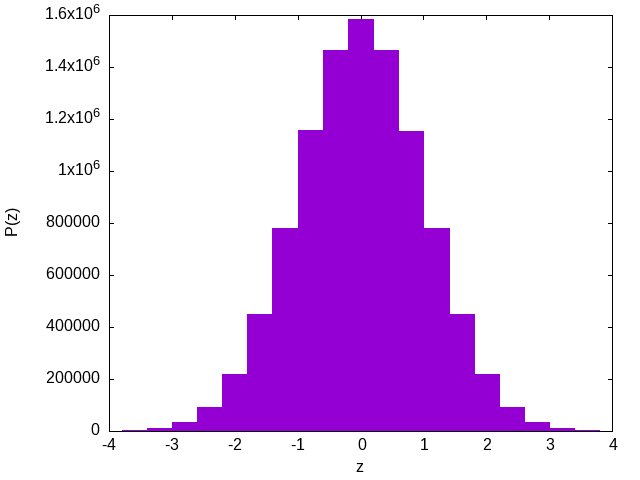

In [19]:
MATH60082::gnuplotImage fig2;
{
    std::stringstream ss;
    ss << "set datafile separator ','" << endl;
    ss << "set xlabel 'z'" << endl;
    ss << "set ylabel 'P(z)'" << endl;
    ss << "unset key" << endl;
    ss << "set style fill solid 1.0 noborder"<< endl;
    ss << "plot'test-4-2.csv' using 2:3 smooth frequency with boxes";
    fig2 = MATH60082::GnuplotWidget::plotCommand(&ss);
    
}
fig2

Looks pretty normal to me!